# Irregular ABP Waveforms
### Author: Stephen Peterkins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

In [2]:
output_notebook()

Loading BokehJS ...

In [12]:
storeA=pd.HDFStore('ABP_A.hd5')
storeB=pd.HDFStore('ABP_B.hd5')
storeC=pd.HDFStore('ABP_C.hd5')

wavesA=storeA.select('Waveforms')
wavesB=storeB.select('Waveforms')
wavesC=storeC.select('Waveforms')

wavesA.head(5)

,AR1,I,II,III,V,SPO2
2017-07-06 12:00:00.000000080,73.4,0.039,0.181,0.142,0.181,34.32
2017-07-06 12:00:00.004166747,80.4,0.054,0.210,0.161,0.195,34.32
2017-07-06 12:00:00.008333414,88.2,0.063,0.244,0.173,0.210,34.32
2017-07-06 12:00:00.012500081,96.2,0.081,0.278,0.193,0.224,34.32
2017-07-06 12:00:00.016666748,103.0,0.093,0.303,0.207,0.244,34.32


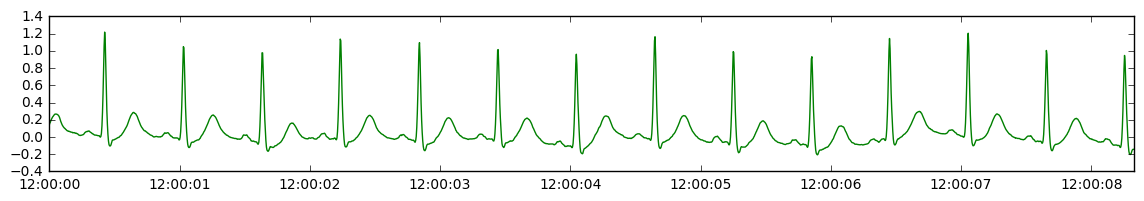

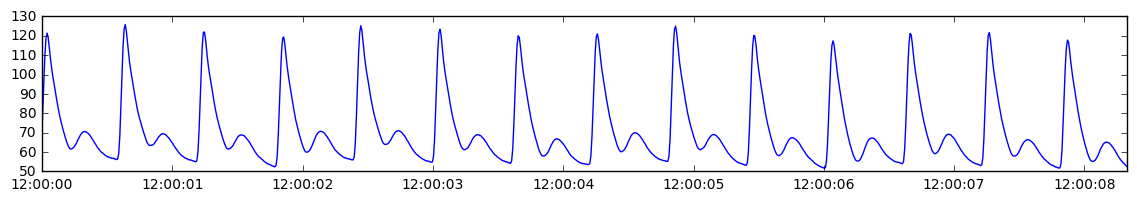

In [24]:
waveform_data = wavesA.head(2000)
ecg_a_signal = waveform_data['III']
abp_a_signal = waveform_data['AR1']

plt.figure(num=1, figsize=(14, 2))
plt.plot(ecg_a_signal, color='green')
plt.figure(num=2, figsize=(14, 2))
plt.plot(abp_a_signal, color='blue')

plt.show()

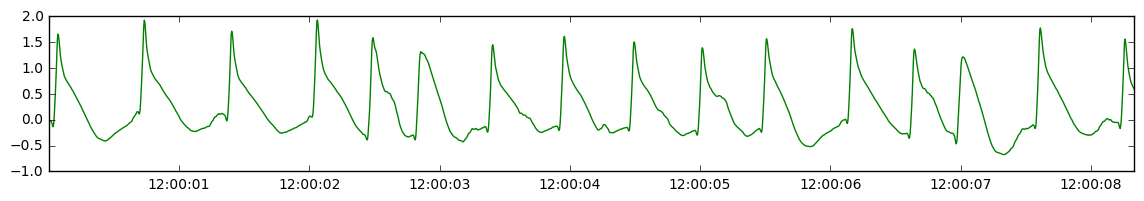

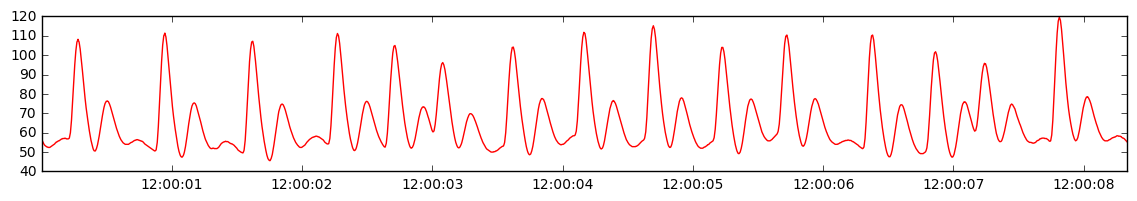

In [20]:
waveform_data = wavesB.head(2000)
ecg_b_signal = waveform_data['III']
abp_b_signal = waveform_data['AR1']

plt.figure(num=3, figsize=(14, 2))
plt.plot(ecg_b_signal, color='green')
plt.figure(num=4, figsize=(14, 2))
plt.plot(abp_b_signal, color='red')

plt.show()

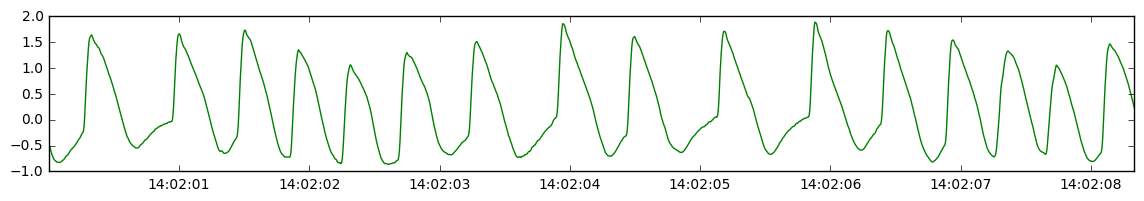

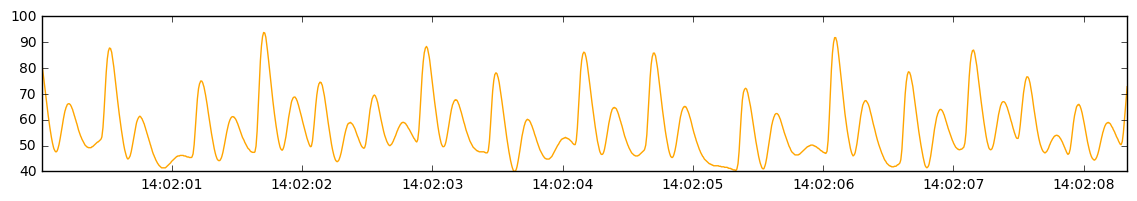

In [28]:
waveform_data = wavesC.head(2000)
ecg_c_signal = waveform_data['II']
abp_c_signal = waveform_data['AR1']

plt.figure(num=3, figsize=(14, 2))
plt.plot(ecg_c_signal, color='green')
plt.figure(num=4, figsize=(14, 2))
plt.plot(abp_c_signal, color='orange')

plt.show()

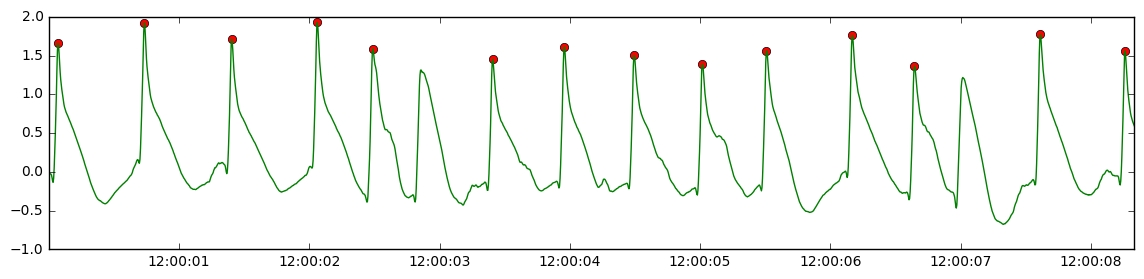

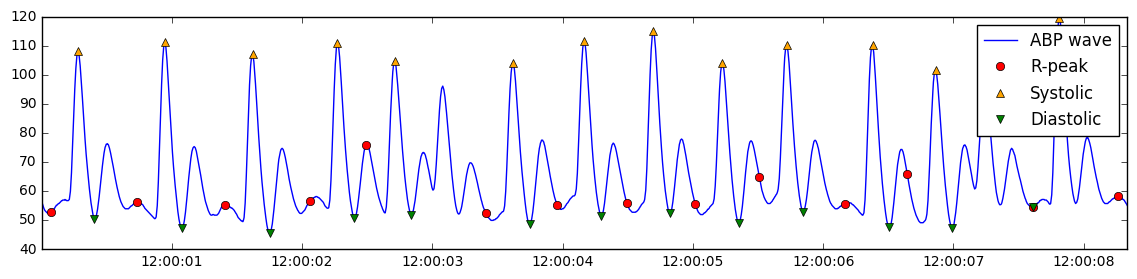

In [31]:
seg_waves = ecg.christov_segmenter(signal=ecg_b_signal.values, sampling_rate=240.)
R_peaks = np.array(seg_waves).tolist()[0]
systolic = [] #max
diastolic = [] #min

ABP_waves = []
ABP_waves_len = []

for i in range(0,len(R_peaks)-1):
    abp_seg = abp_b_signal[list(range(R_peaks[i],R_peaks[i+1]))]
    
    abp_max = abp_seg.index.get_loc(abp_seg[abp_seg == abp_seg.max()].index[0])
    abp_min = abp_seg.index.get_loc(abp_seg[abp_seg == abp_seg.min()].index[0])
    
    ABP_waves.append(abp_seg)
    
    if systolic == []:
        systolic.append(abp_max + R_peaks[0])
        diastolic.append(abp_min + R_peaks[0])
    else:
        wave_int = sum(ABP_waves_len) + R_peaks[0]
        systolic.append(wave_int + abp_max)
        diastolic.append(wave_int + abp_min)

    ABP_waves_len.append(len(abp_seg))
    
plt.figure(num=3, figsize=(14, 3))
plt.plot(ecg_b_signal[R_peaks], 'o', color='red')
plt.plot(ecg_b_signal, color='green')
plt.figure(num=4, figsize=(14, 3))
plt.plot(abp_b_signal, color='blue', label='ABP wave')
plt.plot(abp_b_signal[R_peaks], 'o', color='red', label='R-peak')
plt.plot(abp_b_signal[systolic], '^', color='orange', label='Systolic')
plt.plot(abp_b_signal[diastolic], 'v', color='green', label='Diastolic')
plt.legend(numpoints=1)
plt.show()